In [13]:
import sys
sys.path.append('../')

import numpy as np

from helper import *

In [14]:
from tqdm import tqdm

def research_minibatch_calculation(n_tests=1):
    results = []

    real_weight, real_bias = 2, 0

    dots_count = 500
    variance = 0.5
    X = np.random.rand(dots_count, 1)
    y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)
    loss_real = minibatch_library(X, y).get_loss_history([[real_weight]])[-1]

    for i in tqdm(range(100, X.shape[0] + 1)):
        count_sum = 0
        for j in range(n_tests):
            sgd = minibatch_library(X, y, batch_size=i)
            loss_real = sgd.get_loss_history([[real_weight]])[-1]
            result = sgd.gradient_descent(np.array([0], float), max_epochs=10000, initial_lr=0.001, eps=loss_real+(loss_real), apply_min=True, apply_value=True)
            count_sum += len(result)
        results.append(count_sum / n_tests)
    
    return results

In [15]:
results = research_minibatch_calculation(n_tests=100)

100%|██████████| 401/401 [01:17<00:00,  5.18it/s]


In [16]:
print(results)

[21.39, 21.22, 21.0, 20.86, 20.66, 20.55, 20.28, 20.06, 20.02, 19.76, 19.69, 19.39, 19.25, 19.06, 18.99, 18.8, 18.62, 18.42, 18.28, 18.13, 17.99, 17.93, 17.87, 17.65, 17.43, 17.3, 17.07, 17.02, 16.98, 16.95, 16.82, 16.67, 16.51, 16.27, 16.19, 16.07, 16.01, 16.0, 15.95, 15.8, 15.63, 15.46, 15.3, 15.19, 15.07, 15.01, 14.99, 14.99, 14.93, 14.79, 14.72, 14.51, 14.49, 14.19, 14.07, 14.01, 14.02, 14.03, 13.98, 13.94, 13.91, 13.79, 13.62, 13.48, 13.3, 13.18, 13.12, 13.09, 13.04, 13.0, 13.0, 12.98, 12.99, 12.98, 12.87, 12.86, 12.7, 12.48, 12.44, 12.29, 12.14, 12.15, 12.08, 12.02, 12.0, 12.0, 11.99, 11.99, 12.0, 12.0, 12.0, 11.9, 11.75, 11.69, 11.48, 11.44, 11.27, 11.22, 11.03, 11.03, 11.0, 11.0, 11.0, 11.0, 11.0, 10.99, 11.0, 10.98, 10.99, 10.96, 10.95, 10.84, 10.81, 10.62, 10.59, 10.42, 10.16, 10.18, 10.06, 10.04, 10.05, 10.01, 10.01, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.99, 9.99, 9.95, 9.93, 9.82, 9.73, 9.66, 9.52, 9.46, 9.24, 9.15, 9.08, 9.07, 9.03, 9.03, 9.01, 9.0, 9.0, 

In [28]:
def research_minibatch_view(results):

    # График n_epochs
    X = np.linspace(100, len(results) + 100, len(results))
    plt.plot(X, results, label='Minibatch GD', antialiased=True, linewidth=2)
    plt.xlabel('Batch size')
    plt.ylabel('n epochs')
    plt.legend()

    # plt.savefig('T1.png', dpi=2048, bbox_inches=0, transparent=True)

    plt.show()

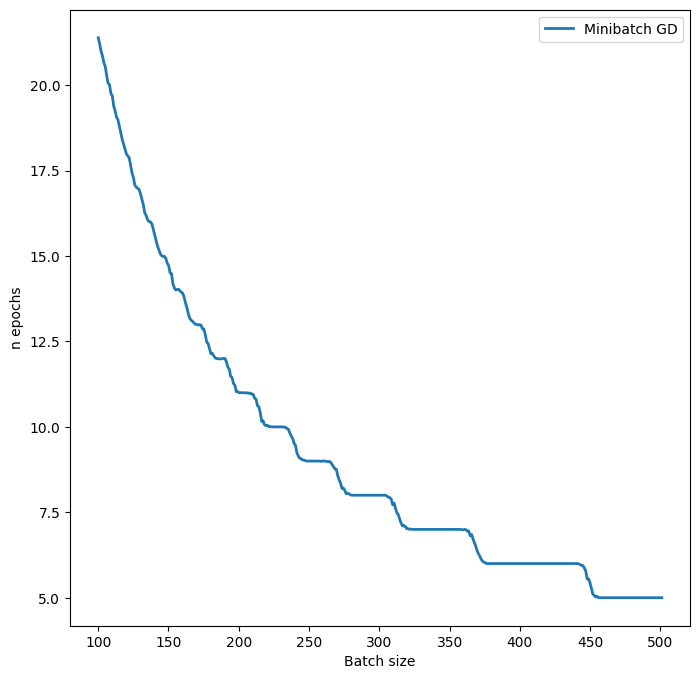

In [29]:
plt.style.use('default')
_ = plt.figure(figsize=(8, 8))

research_minibatch_view(results)

In [19]:
with open('T1.txt', 'w') as file:
    for i in range(100, len(results) + 100):
        file.write(('%d - %g' + "\n") % (i, results[i-100]))